# Serial 1D Multi-grid solution

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import math
import time 

from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

## Numerical set up

In [ ]:
# Parameters to be defined for different grid size and conductivity
dt = 10      # Time step (s)
dx = 1       # Grid size in x      
Dx = 0.1   # Conductivity in x    
# Parameters for the computational domain
alpha = 1    # relaxation coefficient for Jacobi iteration (from 0 to 1)
nx = 128     # Grid point in x
ub = 1       # Velocity (1m/s)

In [ ]:
# the weights matrix
w1 = np.zeros([1,2,1])
w2 = np.zeros([1,3,1])
w1[0,:,0] = 0.5
w2[0][0][0] = - ub*dt/(dx) - Dx*dt/dx**2
w2[0][1][0] = 1 + 2*Dx*dt/dx**2 + ub*dt/(dx)
w2[0][2][0] =  - Dx*dt/dx**2
print('Sum up the weights of filter:', sum(sum(sum(w2))))

Sum up the weights of filter: 1.0


## Weights of layers

In [ ]:
kernel_initializer_1 = tf.keras.initializers.constant(w1)
kernel_initializer_2 = tf.keras.initializers.constant(w2)
bias_initializer = tf.keras.initializers.constant(np.zeros((1,)) )

## Jacobi matrix 

In [ ]:
CNN3D_A_128 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(nx, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer)
])

CNN3D_A_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_1 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(1, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

## Restriction matrix

In [ ]:
CNN3D_res_128 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(nx, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),   
])    
CNN3D_res_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),  
])
CNN3D_res_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer), 
])
CNN3D_res_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer), 
])
CNN3D_res_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])
CNN3D_res_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])
CNN3D_res_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])

## Prolongation matrix

In [ ]:
CNN3D_prol_1 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(1, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

CNN3D_prol_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

CNN3D_prol_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

CNN3D_prol_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),   
])

CNN3D_prol_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 1)),
         tf.keras.layers.UpSampling1D(size=(2)), 
])

CNN3D_prol_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),   
])

CNN3D_prol_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

## Load data 

In [ ]:
# you might need incorporate with SFC code here
T = np.zeros([nx])
for i in range(40):
    T[i+43] = 1 

In [ ]:
import pprint
input_shape = (1,nx,1)
values = tf.zeros(input_shape)
print('values.shape: ', values.shape)
values = tf.Variable(values)[0,:,0].assign(tf.Variable(values)[0,:,0]+tf.convert_to_tensor(T.astype('float32')))
# pprint.pprint(values.numpy().reshape(128,))

values.shape:  (1, 128, 1)


## Initial condition

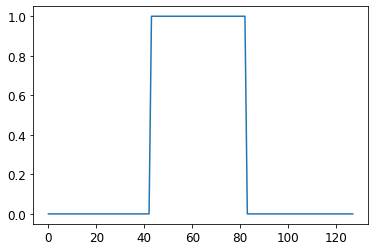

In [ ]:
plt.plot(values[0,:,0])

## Multigrid network with skipping layer

In [ ]:
start = time.time()
b = values           # only for one time step
multi_itr = 1     # multigrid iteration
j_itr = 1            # jacobi iteration 
for multi_grid in range(multi_itr):    
    w_2 = np.zeros([1,2,1])
# --------- Calculate Residual based on initial guess --------  
    r = CNN3D_A_128(values) - b 
# ------------------------------------------------------------  

# --------- Interpolate Residual from finer to coaser mesh --------  
    r_64 = CNN3D_res_128(r) 
    r_32 = CNN3D_res_64(r_64) 
    r_16 = CNN3D_res_32(r_32) 
    r_8 = CNN3D_res_16(r_16) 
    r_4 = CNN3D_res_8(r_8) 
    r_2 = CNN3D_res_4(r_4) 
    # r1 = CNN3D_res_2(r_2)    
# -----------------------------------------------------------------      

# --------- Interpolate Residual from coaser to finer mesh --------  
    # for Jacobi in range(j_itr):
    #     w = w - CNN3D_A_1(w)/w2[0][1][0] + r1/w2[0][1][0]
    # w = w - CNN3D_A_1(w)/w2[0][1][0] + r1/w2[0][1][0]
    # w_2 = CNN3D_prol_1(w)       

    for Jacobi in range(j_itr):
        w_2 = w_2 - CNN3D_A_2(w_2)/w2[0][1][0] + r_2/w2[0][1][0]
        # print("w_2 JACOBI: ",w_2)
    w_4 = CNN3D_prol_2(w_2) 
    for Jacobi in range(j_itr):
        # print("w_4 CNN: ",CNN3D_A_4(w_4))
        w_4 = w_4 - CNN3D_A_4(w_4)/w2[0][1][0] + r_4/w2[0][1][0]
        # print("w_4 JACOBI: ",w_4)
    w_8 = CNN3D_prol_4(w_4) 
    for Jacobi in range(j_itr):
        # print("w_8 CNN: ",CNN3D_A_8(w_8))
        w_8 = w_8 - CNN3D_A_8(w_8)/w2[0][1][0] + r_8/w2[0][1][0]
        # print("w_8 JACOBI: ",w_8)
    w_16 = CNN3D_prol_8(w_8) 
    for Jacobi in range(j_itr):
        w_16 = w_16 - CNN3D_A_16(w_16)/w2[0][1][0] + r_16/w2[0][1][0]
    w_32 = CNN3D_prol_16(w_16) 
    for Jacobi in range(j_itr):
        print("w_32 CNN: ",CNN3D_A_32(w_32))
        w_32 = w_32 - CNN3D_A_32(w_32)/w2[0][1][0] + r_32/w2[0][1][0]
        print("w_32 JACOBI: ",w_32)
    w_64 = CNN3D_prol_32(w_32)
    for Jacobi in range(j_itr):
        w_64 = w_64 - CNN3D_A_64(w_64)/w2[0][1][0] + r_64/w2[0][1][0]
    w_128 = CNN3D_prol_64(w_64)
    w_128 = w_128 - CNN3D_A_128(w_128)/w2[0][1][0] + r/w2[0][1][0]
# ----------------------------------------------------------------- 

# --------- Correct initial guess --------  
    values = values - w_128 
    values = values - CNN3D_A_128(values)/w2[0][1][0] + b/w2[0][1][0]
# ----------------------------------------  
end = time.time()
print('Computational time(s):',(end-start))
print('Multigrid iterations:', multi_itr)
print('Jacobi iterations:', j_itr)

w_32 CNN:  tf.Tensor(
[[[ 6.56489865e-05]
  [-3.06361850e-04]
  [ 3.74746183e-03]
  [ 3.17303697e-04]
  [ 3.17302300e-04]
  [-6.14911970e-03]
  [ 7.79143870e-02]
  [ 6.78372756e-03]
  [ 6.78373501e-03]
  [-1.28174141e-01]
  [ 1.62627804e+00]
  [ 2.37895399e-01]
  [-1.01210463e+00]
  [ 6.62288889e-02]
  [-2.02105850e-01]
  [ 2.49465927e-02]
  [ 2.49465927e-02]
  [ 3.17467339e-02]
  [-5.66550903e-02]
  [ 1.14300326e-01]
  [-1.13569987e+00]
  [-1.03057966e-01]
  [ 2.22599223e-01]
  [-5.29568046e-02]
  [-5.29568046e-02]
  [-9.39983502e-02]
  [ 4.39541787e-01]
  [-1.19152917e-02]
  [-1.19152917e-02]
  [-1.65490136e-02]
  [ 4.36893702e-02]
  [-1.45631284e-02]]], shape=(1, 32, 1), dtype=float32)
w_32 JACOBI:  tf.Tensor(
[[[ 4.20826836e-07]
  [ 2.90370444e-05]
  [ 2.90370663e-05]
  [ 2.92895362e-04]
  [ 2.92895362e-04]
  [ 7.90312421e-04]
  [ 7.90312421e-04]
  [ 6.26190146e-03]
  [ 6.26190193e-03]
  [ 1.66432764e-02]
  [ 2.08950967e-01]
  [ 1.23441942e-01]
  [ 1.23441942e-01]
  [ 4.04932126e-0

### Residual on 4x4 grid

tf.Tensor([ 0.00092456  0.03328402 -0.0147929  -0.01017012], shape=(4,), dtype=float32)


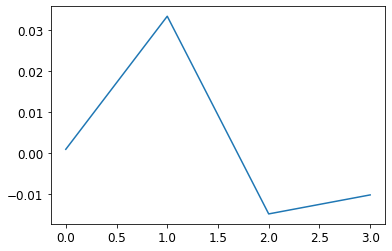

In [ ]:
plt.plot(w_4[0,:,0])
print(w_4[0,:,0])

### Residual on 8x8 grid

tf.Tensor(
[ 7.1119750e-05  3.3426264e-03  5.1419556e-02  2.7025491e-02
  2.7025487e-02 -6.1376311e-02 -1.3299385e-02 -8.6054849e-03], shape=(8,), dtype=float32)


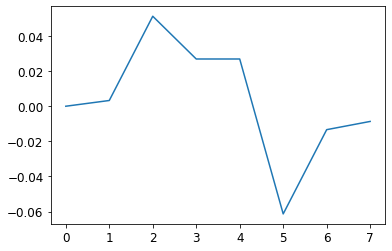

In [ ]:
plt.plot(w_8[0,:,0])
print(w_8[0,:,0])

### Residual on 16x16 grid

tf.Tensor(
[ 5.4707489e-06  3.1730335e-04  3.1730323e-04  6.7837266e-03
  6.7837276e-03  1.4174159e-01  4.5587741e-02  2.4946608e-02
  2.4946608e-02  1.8146466e-02 -7.8007385e-02 -5.2956834e-02
 -5.2956834e-02 -1.1915286e-02 -1.1915286e-02 -7.2815642e-03], shape=(16,), dtype=float32)


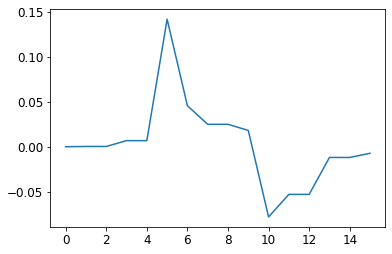

In [ ]:
plt.plot(w_16[0,:,0])
print(w_16[0,:,0])

### Residual on 32x32 grid

tf.Tensor(
[ 4.20826836e-07  2.90370444e-05  2.90370663e-05  2.92895362e-04
  2.92895362e-04  7.90312421e-04  7.90312421e-04  6.26190146e-03
  6.26190193e-03  1.66432764e-02  2.08950967e-01  1.23441942e-01
  1.23441942e-01  4.04932126e-02  4.04932126e-02  2.30276398e-02
  2.30276398e-02  2.25045513e-02  2.25045495e-02  9.35413409e-03
 -1.82953551e-01 -7.00798482e-02 -7.00798482e-02 -4.88832332e-02
 -4.88832332e-02 -4.57261913e-02 -4.57261913e-02 -1.09987250e-02
 -1.09987250e-02 -1.06422845e-02 -1.06422845e-02 -6.16132375e-03], shape=(32,), dtype=float32)


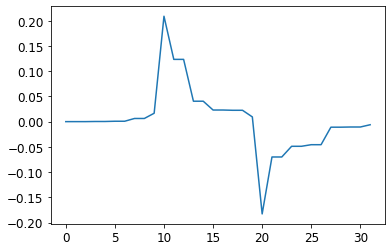

In [ ]:
plt.plot(w_32[0,:,0])
print(w_32[0,:,0])

### Residual on 64x64 grid

tf.Tensor(
[ 3.23713039e-08  2.58970294e-06  2.58970249e-06  2.68034291e-05
  2.68034273e-05  4.71002386e-05  4.71002422e-05  2.70364952e-04
  2.70364952e-04  3.08627787e-04  3.08627757e-04  7.29519059e-04
  7.29519059e-04  1.15041062e-03  1.15041062e-03  5.78021677e-03
  5.78021677e-03  6.57878490e-03  6.57878350e-03  3.01559232e-02
  3.01559418e-02  5.70915580e-01  1.86300203e-01  1.13946408e-01
  1.13946408e-01  1.07565738e-01  1.07565738e-01  3.73783484e-02
  3.73783484e-02  3.60348448e-02  3.60348448e-02  2.12562829e-02
  2.12562829e-02  2.12160442e-02  2.12160442e-02  2.07734313e-02
  2.07734313e-02  1.97618585e-02  1.97618604e-02 -6.15831371e-03
 -6.15830719e-03 -5.44812977e-01 -1.60197616e-01 -6.46890849e-02
 -6.46890849e-02 -6.30585775e-02 -6.30585849e-02 -4.51229848e-02
 -4.51229848e-02 -4.48801368e-02 -4.48801368e-02 -4.22087945e-02
 -4.22087945e-02 -3.95374522e-02 -3.95374484e-02 -1.01526696e-02
 -1.01526696e-02 -1.01252515e-02 -1.01252515e-02 -9.82364733e-03
 -9.82364733e-

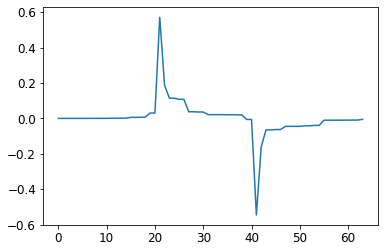

In [ ]:
plt.plot(w_64[0,:,0])
print(w_64[0,:,0])

### Residual on 128x128 grid

tf.Tensor(
[ 2.4901006e-09  2.2659903e-07  2.2659901e-07  2.3904950e-06
  2.3904950e-06  4.2530892e-06  4.2530901e-06  2.4741626e-05
  2.4741626e-05  2.6302918e-05  2.6302920e-05  4.3477143e-05
  4.3477143e-05  6.0651357e-05  6.0651364e-05  2.4956765e-04
  2.4956765e-04  2.5251094e-04  2.5251094e-04  2.8488718e-04
  2.8488718e-04  3.1726339e-04  3.1726339e-04  6.7340216e-04
  6.7340216e-04  7.0577842e-04  7.0577848e-04  1.0619175e-03
  1.0619175e-03  1.4180564e-03  1.4180564e-03  5.3355847e-03
  5.3355847e-03  5.3970129e-03  5.3970129e-03  6.0727242e-03
  6.0727242e-03  7.8863492e-03  7.8863502e-03  2.7836241e-02
  2.7836237e-02  6.9433145e-02 -7.4899271e-03  1.3435670e+00
  4.9741322e-01  1.6640374e-01  1.6640374e-01  1.0518129e-01
  1.0518129e-01  1.0469048e-01  1.0469047e-01  9.9291444e-02
  9.9291444e-02  9.3892418e-02  9.3892425e-02  3.4503091e-02
  3.4503091e-02  3.4399744e-02  3.4399744e-02  3.3262931e-02
  3.3262931e-02  3.2126121e-02  3.2126121e-02  1.9621186e-02
  1.9621186e-

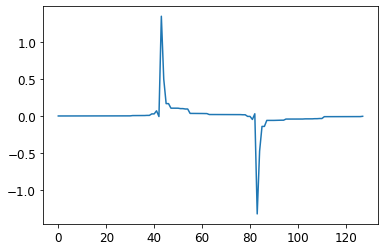

In [ ]:
plt.plot(w_128[0,:,0])
print(w_128[0,:,0])

### Steady state results

tf.Tensor(
[-1.74306951e-08 -1.95376941e-08 -3.75621880e-07 -3.75621994e-07
 -2.34988738e-06 -2.34988738e-06 -5.50197001e-06 -5.50197001e-06
 -2.29585221e-05 -2.29585239e-05 -2.56007097e-05 -2.56007133e-05
 -4.14538408e-05 -4.14538408e-05 -7.05178900e-05 -7.05179118e-05
 -2.30596561e-04 -2.30596546e-04 -2.35577521e-04 -2.35577492e-04
 -2.65463255e-04 -2.65463255e-04 -3.20253806e-04 -3.20253806e-04
 -6.24092470e-04 -6.24092412e-04 -6.78883109e-04 -6.78883167e-04
 -1.00762688e-03 -1.00762688e-03 -1.61032355e-03 -1.61032332e-03
 -4.92988015e-03 -4.92988015e-03 -5.03383577e-03 -5.03383577e-03
 -5.74510172e-03 -5.74510172e-03 -8.81431438e-03 -8.81431438e-03
 -2.88947523e-02 -2.29775906e-02 -8.51793587e-02  1.21921249e-01
 -1.49664700e-01  5.66311598e-01  8.51105928e-01  8.51105928e-01
  9.02947307e-01  9.02947366e-01  9.03777957e-01  9.03777957e-01
  9.08761680e-01  9.08761680e-01  9.17898536e-01  9.17898476e-01
  9.68158960e-01  9.68158960e-01  9.68333900e-01  9.68333840e-01
  9.69383180e-

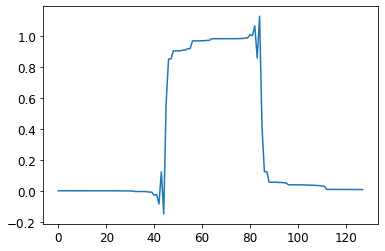

In [ ]:
plt.plot(values[0,:,0])
print(values[0,:,0])

# Pre-installation

In [ ]:
## Install the required dependencies
! python -m pip install mpi4py
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# MPI subroutines

In [ ]:
%%writefile halo_exchange.py
# imports
import os
import sys
import numpy as np  # cupy can be used as optimisation if CUDA/AMD GPUs are available
from tensorflow import keras
import tensorflow as tf
import math
from mpi4py import MPI

assert tf.__version__ >= "2.0"
np.set_printoptions(threshold=sys.maxsize) # print out the full numpy array

############################## Global variables ################################
comm = None               # MPI communicator
rank = 0                  # Process rank    
num_process = 1           # Number of processors
rows,cols = 1,1           # Cartesian topology for 2D structured mesh
sub_nx, sub_ny, sub_nz = 0,0,0 # Dimensions for sub-domain up to 3D
neighbors = [-2, -2, -2, -2, -2, -2] # Process rank for all neighboring subdomains
current_vector = None     # 1D Block structured sub-domain
current_domain = None     # 2D Block Structured sub-domain
current_cube = None       # 3D Block Structured sub-domain
is_double_precision = False   # variable control the precision of MPI communication buffer vlaues
is_diagonal_exchange = False  # control do we need exchange values on corners

# TODO: the best practice is to use OOP
# class halo_exchange:
#   # initialization
#   def __init__(self) -> None:

#   # member functions
  
############################## Util functions ##################################
# clear the cached subdomain to release memory
def clear_cache():
  global current_domain, current_cube
  if current_domain != None:
    del current_domain
  if current_cube != None:
    del current_cube

def id_2_idx(rank, cols):
    """
    return the indices of processor in processor
    grid space based on the processor ranks

    Parameters
    ----------
    rank : int
        the rank of the process
    cols :
        the colun number of the process grid space

    Returns
    -------
    int
        x and y coordinate of the processor

    Raises
    ------
    None
    """
    return rank/cols, rank % cols

def idx_2_id(rows, cols, id_row, id_col):
    """
    return the rank of processor in processor
    grid space based on the indices

    Parameters
    ----------
    rows : int
        the rank of the process
    cols :
        the colun number of the process grid space

    Returns
    -------
    int
        x and y coordinate of the processor

    Raises
    ------
    None
    """
    if id_row >= rows or id_row < 0:
        return -1
    if id_col >= cols or id_col < 0:
        return -1
    return id_row * id_col + id_col

def generate_dimension_2D(num_process):
    """
    return the rank of processor in processor
    grid space based on the indices

    Parameters
    ----------
    rows : int
        the rank of the process
    cols :
        the colun number of the process grid space

    Returns
    -------
    int
        x and y coordinate of the processor

    Raises
    ------
    None
    """
    global rows,cols
    rows,cols = 0,0
    min_gap = num_process
    max_val = int(num_process**0.5 + 1)
    for i in range(1, max_val+1):
        if num_process % i == 0:
            gap = abs(num_process/i - i)
            if gap < min_gap:
                min_gap = gap
                rows = i
                cols = int(num_process / i)

    return rows, cols

def generate_dimension_3D(num_process):
  # TODO: generate dimension for 3D processor grid space
  pass

def domain_decomposition_strip(mesh, num_process):
    """
    return the rank of processor in processor
    grid space based on the indices

    Parameters
    ----------
    rows : int
        the rank of the process
    cols :
        the colun number of the process grid space

    Returns
    -------
    int
        x and y coordinate of the processor

    Raises
    ------
    None
    """
    sub_domains = np.hsplit(mesh, num_process)
    return sub_domains

def domain_decomposition_grid(mesh, rows, cols):
    """
    return the rank of processor in processor
    grid space based on the indices

    Parameters
    ----------
    rows : int
        the rank of the process
    cols :
        the colun number of the process grid space

    Returns
    -------
    int
        x and y coordinate of the processor

    Raises
    ------
    None
    """
    nx, ny = mesh.shape
    assert nx % rows == 0, f"{nx} rows is not evenly divisible by {rows}"
    assert ny % cols == 0, f"{ny} cols is not evenly divisible by {cols}"
    sub_nx = nx//rows
    sub_ny = ny//cols
    return (mesh.reshape(nx//sub_nx, sub_nx, -1, sub_ny)
            .swapaxes(1, 2)
            .reshape(-1, sub_nx, sub_ny))
    
def domain_decomposition_cube(mesh, proc_grid_dim):
  """
  return the rank of processor in processor
  grid space based on the indices

  Parameters
  ----------
  rows : int
      the rank of the process
  cols :
      the colun number of the process grid space

  Returns
  -------
  int
      x and y coordinate of the processor

  Raises
  ------
  None
  """
  global sub_nx,sub_ny,sub_nz
  nx, ny, nz = mesh.shape
  
  assert nx % proc_grid_dim[0] == 0, f"{nx} grids along x axis is not evenly divisible by {proc_grid_dim[0]}"
  assert ny % proc_grid_dim[1] == 0, f"{ny} grids along y axis is not evenly divisible by {proc_grid_dim[1]}"
  assert nz % proc_grid_dim[2] == 0, f"{nz} grids along z axis is not evenly divisible by {proc_grid_dim[2]}"
  
  sub_nx = nx // proc_grid_dim[0]
  sub_ny = ny // proc_grid_dim[1]
  sub_nz = nz // proc_grid_dim[2]

  new_shape = (sub_nx,sub_ny,sub_nz)
  num_cubes = np.array(mesh.shape) // new_shape
  split_shape = np.column_stack([num_cubes, new_shape]).reshape(-1)
  order = np.array([0,2,4,1,3,5])

  return mesh.reshape(split_shape).transpose(order).reshape(-1, *new_shape) # return a numpy array


def find_neighbours_id_2D(rank, rows, cols, proc_row_idx, proc_col_idx,num_process):
    """
    return the rank of processor in processor
    grid space based on the indices

    Parameters
    ----------
    rows : int
        the rank of the process
    cols :
        the colun number of the process grid space

    Returns
    -------
    int
        x and y coordinate of the processor

    Raises
    ------
    None
    """
    # TODO: Consider the conditions in periodic boundaries (if required) 
    # left,right,top,bottom = find_neighbours_id(rank,rows,cols,proc_row_idx,proc_col_idx,num_process)
    # print("[INFO] Neighbors of process {}: left={},right={},up={},down={}".format(rank,left,right,top,bottom))
    left_neighbour = (rank - 1) if proc_col_idx != 0 and rank >=1 else MPI.PROC_NULL
    right_neighbour = (rank + 1) if proc_col_idx != (cols-1) and rank < num_process - 1 else MPI.PROC_NULL
    top_neighbour = (rank - cols) if proc_row_idx != 0 and (rank - cols) >=0 else MPI.PROC_NULL
    bottom_neighbour = (rank + cols) if proc_row_idx != (rows-1) and (rank + cols) <= num_process-1 else MPI.PROC_NULL

    return left_neighbour, right_neighbour, top_neighbour, bottom_neighbour

# padding halos to sub-domain manually
def padding_block_halo_1D(sub_domain,halo_size,halo_val = 0):
  if tf.is_tensor(sub_domain):
     sub_domain = sub_domain.numpy()

  if sub_domain.ndim > 1:
    sub_domain = np.squeeze(sub_domain,axis=0)
    sub_domain = np.squeeze(sub_domain,axis=-1)

  return np.pad(sub_domain,(halo_size,halo_size),'constant',constant_values=(halo_val,))

def padding_block_halo_2D(sub_domain,halo_size,halo_val = 0):
  if tf.is_tensor(sub_domain):
     sub_domain = sub_domain.numpy()

  if sub_domain.ndim > 2:
    sub_domain = np.squeeze(sub_domain)

  # note padding halo values with 0 by default
  return np.pad(sub_domain,(halo_size,halo_size),'constant',constant_values=(halo_val,))

# incase we need diff size of halos on each boudary
def padding_block_halo_2D_custom(sub_domain,halo_dim,halo_vals):
  pass 

def padding_block_halo_3D(sub_cube,halo_size,halo_val = 0):
  if tf.is_tensor(sub_cube):
    sub_cube = sub_cube.numpy()

  if sub_cube.ndim > 3:
    sub_cube = remove_one_dims(sub_cube)
  
  nx,ny,nz = sub_cube.shape

  # note padding halo values with 0 by default
  ans = np.pad(sub_cube,(halo_size,halo_size),'constant',constant_values=(halo_val,))
  return tf.convert_to_tensor(ans.reshape(1,nx+2,ny+2,nz+2,1))

# incase we need diff size of halos on each boudary
def padding_block_halo_3D_custom(sub_cube,halo_dim,halo_vals):
  pass 


# remove trivial 1 dimensions of the tensor.numpy()
def remove_one_dims(input):
  while input.ndim > 3:
      if input.shape[0] == 1:
          input = np.squeeze(input,axis = 0)
      if input.shape[-1] == 1:
          input = np.squeeze(input,axis = -1)
  return  input

############################## MPI Initialization ##############################
def mpi_initialization(proc_grid_dim,is_periodic,is_reordered):
  global rank,num_process,comm
  # rank = MPI.COMM_WORLD.Get_rank() # get process id
  # num_process = MPI.COMM_WORLD.Get_size() # get number of process
  # assert num_process > 1, f"Parallelisation involves 2 or more processes, otherwise run implementation without MPI"

  # creat topology using Create_cart(): https://learn2codewithmesite.wordpress.com/2017/10/16/creating-topologies-in-mpi4py/
  comm = MPI.COMM_WORLD.Create_cart(
    proc_grid_dim,
    periods=is_periodic, # set True if periodic boundary
    reorder=is_reordered)
  
  rank = comm.rank

def domain_decomposition_1D(values, nx, is_periodic=False,is_reordered=True):
  global num_process,comm,rank, sub_nx, neighbors, current_vector
  LEFT = 0
  RIGHT = 1

  num_process = MPI.COMM_WORLD.Get_size() # get number of process
  proc_grid_dim = (num_process,)
  mpi_initialization(proc_grid_dim, is_periodic, is_reordered)

  neighbors[LEFT], neighbors[RIGHT] = comm.Shift(0, 1)

  print("NEIGHBORS OF {} ".format(rank),neighbors)

  sub_domains = domain_decomposition_strip(values.reshape(nx,), num_process)  # (1,x)
  sub_nx = sub_domains[rank].shape[0]
  current_vector = np.pad(sub_domains[rank],(1,1),"constant",constant_values=(0,))

  return sub_nx, current_vector

# grid decomposition for 2D block structured meshes
def domain_decomposition_2D(values, nx, ny, is_periodic=(False,False),is_reordered=True):
  global comm,rank, sub_nx, sub_ny, neighbors,current_domain

  TOP = 0
  BOTTOM = 1
  LEFT = 2
  RIGHT = 3

  num_process = MPI.COMM_WORLD.Get_size() # get number of process
  proc_grid_dim = generate_dimension_2D(num_process)
  mpi_initialization(proc_grid_dim, is_periodic, is_reordered)

  if rows == 1 or cols == 1:
    sub_domains = domain_decomposition_strip(values.reshape(nx,ny), num_process)  # 2 process
    sub_nx, sub_ny = sub_domains[0].shape
  else:
    # if the process arrays is 2D then use grid decomposition to split domain
    sub_domains = domain_decomposition_grid(values.reshape(nx,ny), rows, cols)
    sub_nx, sub_ny = sub_domains[0].shape

  # create customized MPI datatype
  grid_size = [sub_nx,sub_ny]
  subdomain_size = [sub_nx+2, sub_ny + 2]
  start_indices = [1,1]

  comm_datatype = MPI.DOUBLE.Create_subarray(subdomain_size, grid_size, start_indices).Commit()

  # find the processor id of all neighboring processors
  neighbors[TOP], neighbors[BOTTOM] = comm.Shift(0, 1)
  neighbors[LEFT],  neighbors[RIGHT]  = comm.Shift(1, 1)

  current_domain = np.pad(sub_domains[rank],(1,1),"constant",constant_values=(0,))

  return sub_nx, sub_ny, current_domain

def domain_decomposition_3D(values, nx, ny, nz, is_periodic=(False,False,False),is_reordered=True):
  global rank, num_process, neighbors, current_cube

  # neighbor indices
  LEFT = 0
  RIGHT = 1
  FRONT = 2
  BEHIND = 3
  TOP = 4
  BOTTOM = 5

  num_process = MPI.COMM_WORLD.Get_size() # get number of process
  # TODO: create Cartesian topology for processes in 3D space
  proc_grid_dim = (2,2,2) # divide to 2x2x2, 8 subcubes
  mpi_initialization(proc_grid_dim, is_periodic, is_reordered)
  
  # edge case, if 1 process we do nothing
  if num_process == 1:
    return nx,ny,nz,values

  # TODO: when do we split the problem space into rectangular spaces?
  if tf.is_tensor(values):
    sub_cubes = domain_decomposition_cube(tf.reshape(values,[nx,ny,nz]).numpy(),proc_grid_dim)
    # we can do this in complete tensorflow routines
    # current_cube = tf.convert_to_tensor(sub_cubes[rank], dtype=tf.float32)
    # paddings = tf.constant([[1, 1], [1, 1], [1, 1]])
    # current_cube = tf.pad(current_cube, paddings)
  else:
    sub_cubes = domain_decomposition_cube(values.reshape(nx,ny,nz),proc_grid_dim) # if it is numpy reshape directly

  # create customized MPI datatype
  cube_size = [sub_nx,sub_ny,sub_nz]
  subcube_size = [sub_nx+2, sub_ny + 2, sub_nz + 2]
  start_indices = [1,1,1]

  # use datatypes with 64 bits
  # comm_datatype_3D = MPI.DOUBLE.Create_subarray(subcube_size, cube_size, start_indices).Commit()

  # padding the halo grids
  current_cube = np.pad(sub_cubes[rank],(1,1),'constant',constant_values=(0,))

  # print("[CURRENT_CUBE_SHAPE of {}]".format(rank), current_cube.shape)


  # find neighbors (note here 0,1,2 are x,y,z coordinates respectively)
  neighbors[LEFT], neighbors[RIGHT] = comm.Shift(2, 1)
  neighbors[FRONT],  neighbors[BEHIND]  = comm.Shift(1, 1)
  neighbors[BOTTOM],  neighbors[TOP]  = comm.Shift(0, 1)

  # print("[NEIGHBORS of {}] ".format(rank),neighbors)

  # return tf.convert_to_tensor(current_cube,np.float64)
  return sub_nx, sub_ny, sub_nz, current_cube

def structured_halo_update_1D(input_vector):
  global comm,neighbors,current_vector,sub_nx

  if tf.is_tensor(input_vector):
     current_vector = input_vector.numpy()
  else:
    current_vector = input_vector

  if current_vector.ndim > 1:
    current_vector = np.squeeze(current_vector,axis=0)
    current_vector = np.squeeze(current_vector,axis=-1)

  #print("reduced shape: ",current_vector.shape)  

  LEFT = 0
  RIGHT = 1

  sub_nx = current_vector.shape[0]

  send_left = np.copy(np.ascontiguousarray(current_vector[1]))
  recv_right = np.empty_like(send_left)
  send_right = np.copy(np.ascontiguousarray(current_vector[-2]))
  recv_left = np.empty_like(send_right)

  comm.Send(buf=[send_left,1,MPI.DOUBLE],dest=neighbors[LEFT],tag=11) # send to left
  comm.Send(buf=[send_right,1,MPI.DOUBLE],dest=neighbors[RIGHT],tag=22) # send to left
  comm.Recv(buf=[recv_right,1,MPI.DOUBLE],source=neighbors[RIGHT],tag=11)
  comm.Recv(buf=[recv_left,1,MPI.DOUBLE],source=neighbors[LEFT],tag=22)

  # Non-blocking send-recv, which gives the same result
  # requests = []
  # requests.append(comm.Isend([send_left,1,MPI.DOUBLE],dest=neighbors[LEFT]))
  # requests.append(comm.Isend([send_right,1,MPI.DOUBLE],dest=neighbors[RIGHT]))
  # requests.append(comm.Irecv([recv_right,1,MPI.DOUBLE],source=neighbors[RIGHT]))
  # requests.append(comm.Irecv([recv_left,1,MPI.DOUBLE],source=neighbors[LEFT]))
  # MPI.Request.Waitall(requests)

  if neighbors[RIGHT] != -2:
    current_vector[-1] = recv_right
  if neighbors[LEFT] != -2:
    current_vector[0] = recv_left

  return tf.convert_to_tensor(current_vector.reshape(1,sub_nx,1))

# parallel halo update for 2D block structured mesh
def structured_halo_update_2D(input_domain):
  global comm,neighbors,current_domain,sub_nx,sub_ny,sub_nz

  sub_nx, sub_ny = input_domain.shape

  current_domain = input_domain

  # neighbor indices
  TOP = 0
  BOTTOM = 1
  LEFT = 2
  RIGHT = 3
  
  # left and right
  # try non-blocking send and blocking receive
  send_left = np.ascontiguousarray(current_domain[1:-1,1])
  recv_right = np.zeros_like(send_left)
  send_right = np.ascontiguousarray(current_domain[1:-1,-2])
  recv_left = np.zeros_like(send_right)

  # Non-blocking send
  comm.Isend(buf=send_left,dest=neighbors[LEFT],tag=11) # send to left
  comm.Isend(buf=send_right,dest=neighbors[RIGHT],tag=22) # send to left
  comm.Recv(buf=recv_right,source=neighbors[RIGHT],tag=11)
  comm.Recv(buf=recv_left,source=neighbors[LEFT],tag=22)
  if neighbors[RIGHT] != -2:
    current_domain[1:-1,-1] = recv_right
  if neighbors[LEFT] != -2:
    current_domain[1:-1,0] = recv_left

  send_top = np.ascontiguousarray(current_domain[1,:])
  recv_bottom = np.zeros_like(send_top)
  send_bottom = np.ascontiguousarray(current_domain[-2,:])
  recv_top = np.zeros_like(send_bottom)

  comm.Isend(buf=send_top,dest=neighbors[TOP],tag=33) # send to left
  comm.Isend(buf=send_bottom,dest=neighbors[BOTTOM],tag=44) # send to left
  comm.Recv(buf=recv_bottom,source=neighbors[BOTTOM],tag=33)
  comm.Recv(buf=recv_top,source=neighbors[TOP],tag=44)
  if neighbors[TOP] != -2:
    current_domain[0,:] = recv_top
  if neighbors[BOTTOM] != -2:
    current_domain[-1,:] = recv_bottom

  return tf.convert_to_tensor(current_domain.reshape(1,sub_nx, sub_ny,1))
  # return current_domain

# parallel halo update for 3D block structured mesh
# def structured_halo_update_3D(input_cube):
#   global current_cube, neighbors,sub_nx, sub_ny,sub_nz

#   sub_nx, sub_ny, sub_nz = input_cube.shape
  
#   # input cube is a 3D numpy array
#   current_cube = tf.reshape(input_cube,[sub_nx, sub_ny, sub_nz]).numpy()

#   # neighbor indices
#   LEFT = 0
#   RIGHT = 1
#   FRONT = 2
#   BEHIND = 3
#   TOP = 4
#   BOTTOM = 5

#   # FRONT AND BEHIND
#   front_buffer = np.copy(np.ascontiguousarray(current_cube[1:-1, 1, 1:-1]))
#   behind_buffer = np.copy(np.ascontiguousarray(current_cube[1:-1, -2, 1:-1]))
#   comm.Sendrecv_replace(front_buffer,neighbors[FRONT],0,neighbors[FRONT],1)
#   comm.Sendrecv_replace(behind_buffer,neighbors[BEHIND],1,neighbors[BEHIND],0)

#   if neighbors[FRONT] != -2:
#     current_cube[1:-1,0,1:-1] = front_buffer
#   if neighbors[BEHIND] != -2:
#     current_cube[1:-1,-1,1:-1] = behind_buffer

#   del front_buffer,behind_buffer # release memory

#   # LEFT AND RIGHT
#   left_buffer = np.copy(np.ascontiguousarray(current_cube[:, :, 1]))
#   right_buffer = np.copy(np.ascontiguousarray(current_cube[:, :, -2]))
#   comm.Sendrecv_replace(left_buffer,neighbors[LEFT],2,neighbors[LEFT],3)
#   comm.Sendrecv_replace(right_buffer,neighbors[RIGHT],3,neighbors[RIGHT],2)

#   # Update the left and right
#   if neighbors[LEFT] != -2:
#     current_cube[:,:,0] = left_buffer
#   if neighbors[RIGHT] != -2:
#     current_cube[:,:,-1] = right_buffer

#   del left_buffer,right_buffer # release memory

#   #TOP AND BOTTOM
#   top_buffer = np.copy(np.ascontiguousarray(current_cube[-2,:,:]))
#   bottom_buffer = np.copy(np.ascontiguousarray(current_cube[1,:,:]))
#   comm.Sendrecv_replace(top_buffer,neighbors[TOP],4,neighbors[TOP],5)
#   comm.Sendrecv_replace(bottom_buffer,neighbors[BOTTOM],5,neighbors[BOTTOM],4)

#   if neighbors[TOP] != -2:
#     current_cube[-1,:,:] = top_buffer
#   if neighbors[BOTTOM] != -2:
#     current_cube[0,:,:] = bottom_buffer

#   del top_buffer,bottom_buffer # release memory
    
#   return tf.convert_to_tensor(current_cube.reshape(1,sub_nx,sub_ny,sub_nz,1))

# non-blocking send and recv
def structured_halo_update_3D(input_cube):
  global current_cube, neighbors,sub_nx, sub_ny,sub_nz

  current_cube = input_cube

  if tf.is_tensor(input_cube):
     current_cube = current_cube.numpy()

  if input_cube.ndim > 3:
    current_cube = remove_one_dims(current_cube)

  sub_nx,sub_ny,sub_nz = current_cube.shape

  # neighbor indices
  LEFT = 0
  RIGHT = 1
  FRONT = 2
  BEHIND = 3
  TOP = 4
  BOTTOM = 5

  requests = [] # [ None ] * (2*nprocs) for other languages

  # FRONT AND BEHIND
  sendbuffer_1 = np.copy(np.ascontiguousarray(current_cube[1:-1,1,1:-1]))
  sendbuffer_2 = np.copy(np.ascontiguousarray(current_cube[1:-1,-2,1:-1]))
  recvbuffer_1 = np.empty_like(sendbuffer_2)
  recvbuffer_2 = np.empty_like(sendbuffer_1)

  requests.append(comm.Isend(sendbuffer_1,dest=neighbors[FRONT]))
  requests.append(comm.Isend(sendbuffer_2,dest=neighbors[BEHIND]))
  requests.append(comm.Irecv(recvbuffer_1,source=neighbors[BEHIND]))
  requests.append(comm.Irecv(recvbuffer_2,source=neighbors[FRONT]))
  MPI.Request.Waitall(requests)

  # update front and behind
  if neighbors[FRONT] != -2:
    current_cube[1:-1,0,1:-1] = recvbuffer_2
  if neighbors[BEHIND] != -2:
    current_cube[1:-1,-1,1:-1] = recvbuffer_1

  sendbuffer_1 = np.copy(np.ascontiguousarray(current_cube[:,:,1]))
  sendbuffer_2 = np.copy(np.ascontiguousarray(current_cube[:,:,-2]))
  recvbuffer_1 = np.empty_like(sendbuffer_2)
  recvbuffer_2 = np.empty_like(sendbuffer_1)

  requests.append(comm.Isend(sendbuffer_1,dest=neighbors[LEFT]))
  requests.append(comm.Isend(sendbuffer_2,dest=neighbors[RIGHT]))
  requests.append(comm.Irecv(recvbuffer_1,source=neighbors[RIGHT]))
  requests.append(comm.Irecv(recvbuffer_2,source=neighbors[LEFT]))
  MPI.Request.Waitall(requests)

  if neighbors[LEFT] != -2:
    current_cube[:,:,0] = recvbuffer_2
  if neighbors[RIGHT] != -2:
    current_cube[:,:,-1] = recvbuffer_1

  sendbuffer_1 = np.copy(np.ascontiguousarray(current_cube[-2,:,:]))
  sendbuffer_2 = np.copy(np.ascontiguousarray(current_cube[1,:,:]))
  recvbuffer_1 = np.empty_like(sendbuffer_2)
  recvbuffer_2 = np.empty_like(sendbuffer_1)

  requests.append(comm.Isend(sendbuffer_1,dest=neighbors[TOP]))
  requests.append(comm.Isend(sendbuffer_2,dest=neighbors[BOTTOM]))
  requests.append(comm.Irecv(recvbuffer_1,source=neighbors[BOTTOM]))
  requests.append(comm.Irecv(recvbuffer_2,source=neighbors[TOP]))
  MPI.Request.Waitall(requests)

  if neighbors[TOP] != -2:
    current_cube[-1,:,:] = recvbuffer_2
  if neighbors[BOTTOM] != -2:
    current_cube[0,:,:] = recvbuffer_1

  return tf.convert_to_tensor(current_cube.reshape(1,sub_nx,sub_ny,sub_nz,1))

def halo_update_1_cube(input_cube):
  global current_cube, neighbors,sub_nx, sub_ny,sub_nz

  sub_nx, sub_ny, sub_nz = input_cube.shape
  
  # input cube is a 3D numpy array
  current_cube = tf.reshape(input_cube,[sub_nx, sub_ny, sub_nz]).numpy()

  # neighbor indices
  LEFT = 0
  RIGHT = 1
  FRONT = 2
  BEHIND = 3
  TOP = 4
  BOTTOM = 5

  requests = []

  # FRONT AND BEHIND
  sendbuffer_1 = np.copy(np.ascontiguousarray(current_cube[1:-1,0,1:-1]))
  sendbuffer_2 = np.copy(np.ascontiguousarray(current_cube[1:-1,-1,1:-1]))
  recvbuffer_1 = np.empty_like(sendbuffer_2)
  recvbuffer_2 = np.empty_like(sendbuffer_1)

  requests.append(comm.Isend(sendbuffer_1,dest=neighbors[FRONT]))
  requests.append(comm.Isend(sendbuffer_2,dest=neighbors[BEHIND]))
  requests.append(comm.Irecv(recvbuffer_1,source=neighbors[BEHIND]))
  requests.append(comm.Irecv(recvbuffer_2,source=neighbors[FRONT]))
  MPI.Request.Waitall(requests)

  if neighbors[FRONT] != -2:
    current_cube[1:-1,0,1:-1] = recvbuffer_2
  if neighbors[BEHIND] != -2:
    current_cube[1:-1,-1,1:-1] = recvbuffer_1

  # LEFT AND RIGHT
  sendbuffer_1 = np.copy(np.ascontiguousarray(current_cube[:,:,0]))
  sendbuffer_2 = np.copy(np.ascontiguousarray(current_cube[:,:,-1]))
  recvbuffer_1 = np.empty_like(sendbuffer_2)
  recvbuffer_2 = np.empty_like(sendbuffer_1)

  requests.append(comm.Isend(sendbuffer_1,dest=neighbors[LEFT]))
  requests.append(comm.Isend(sendbuffer_2,dest=neighbors[RIGHT]))
  requests.append(comm.Irecv(recvbuffer_1,source=neighbors[RIGHT]))
  requests.append(comm.Irecv(recvbuffer_2,source=neighbors[LEFT]))
  MPI.Request.Waitall(requests)

  # Update the left and right
  if neighbors[LEFT] != -2:
    current_cube[:,:,0] = recvbuffer_2
  if neighbors[RIGHT] != -2:
    current_cube[:,:,-1] = recvbuffer_1

  #TOP AND BOTTOM
  sendbuffer_1 = np.copy(np.ascontiguousarray(current_cube[-1,:,:]))
  sendbuffer_2 = np.copy(np.ascontiguousarray(current_cube[0,:,:]))
  recvbuffer_1 = np.empty_like(sendbuffer_2)
  recvbuffer_2 = np.empty_like(sendbuffer_1)

  requests.append(comm.Isend(sendbuffer_1,dest=neighbors[TOP]))
  requests.append(comm.Isend(sendbuffer_2,dest=neighbors[BOTTOM]))
  requests.append(comm.Irecv(recvbuffer_1,source=neighbors[BOTTOM]))
  requests.append(comm.Irecv(recvbuffer_2,source=neighbors[TOP]))
  MPI.Request.Waitall(requests)

  if neighbors[TOP] != -2:
    current_cube[-1,:,:] = recvbuffer_2
  if neighbors[BOTTOM] != -2:
    current_cube[0,:,:] = recvbuffer_1

  return tf.convert_to_tensor(current_cube.reshape(1,sub_nx,sub_ny,sub_nz,1))

# Adaptive update for prolongation (coarse grids to finer grids)
# not the same as halo update 3D
def adaptive_Jacobi_update_3D(coarse_grid):
  global current_cube, neighbors,sub_nx, sub_ny,sub_nz

  sub_nx, sub_ny, sub_nz = coarse_grid.shape
  half_x = int(sub_nx/2)
  half_y = int(sub_ny/2)
  half_z = int(sub_nz/2)

  quad_x = int(sub_nx/4)
  quad_y = int(sub_ny/4)
  quad_z = int(sub_nz/4)

  # input cube is a 3D numpy array
  current_cube = tf.reshape(coarse_grid,[sub_nx, sub_ny, sub_nz]).numpy()

  # neighbor indices
  LEFT = 0
  RIGHT = 1
  FRONT = 2
  BEHIND = 3
  TOP = 4
  BOTTOM = 5

  # FRONT AND BEHIND
  front_buffer = np.copy(np.ascontiguousarray(current_cube[quad_z:-quad_z, quad_x: half_x, quad_y:-quad_y]))
  behind_buffer = np.copy(np.ascontiguousarray(current_cube[quad_z:-quad_z, half_x:half_x+quad_x, quad_y:-quad_y]))
  comm.Sendrecv_replace([front_buffer, MPI.DOUBLE_PRECISION],neighbors[FRONT],0,neighbors[FRONT],1)
  comm.Sendrecv_replace([behind_buffer,MPI.DOUBLE_PRECISION],neighbors[BEHIND],1,neighbors[BEHIND],0)

  if neighbors[FRONT] != -2:
    current_cube[quad_z:-quad_z,0:quad_x,quad_y:-quad_y] = front_buffer
  if neighbors[BEHIND] != -2:
    current_cube[quad_z:-quad_z,sub_nx - quad_x:,quad_y:-quad_y] = behind_buffer

  del front_buffer,behind_buffer # release memory

  # LEFT AND RIGHT
  left_buffer = np.copy(np.ascontiguousarray(current_cube[:, :, quad_y:half_y]))
  right_buffer = np.copy(np.ascontiguousarray(current_cube[:, :,half_y:half_y+quad_y]))
  comm.Sendrecv_replace([left_buffer,MPI.DOUBLE_PRECISION],neighbors[LEFT],2,neighbors[LEFT],3)
  comm.Sendrecv_replace([right_buffer,MPI.DOUBLE_PRECISION],neighbors[RIGHT],3,neighbors[RIGHT],2)

  # Update the left and right
  if neighbors[LEFT] != -2:
    current_cube[:,:,0:quad_y] = left_buffer
  if neighbors[RIGHT] != -2:
    current_cube[:,:,sub_ny - quad_y:] = right_buffer

  del left_buffer,right_buffer # release memory

  #TOP AND BOTTOM
  top_buffer = np.copy(np.ascontiguousarray(current_cube[half_z:half_z+quad_z,:,:]))
  bottom_buffer = np.copy(np.ascontiguousarray(current_cube[quad_z:half_z,:,:]))
  comm.Sendrecv_replace([top_buffer,MPI.DOUBLE_PRECISION],neighbors[TOP],4,neighbors[TOP],5)
  comm.Sendrecv_replace([bottom_buffer,MPI.DOUBLE_PRECISION],neighbors[BOTTOM],5,neighbors[BOTTOM],4)

  if neighbors[TOP] != -2:
    current_cube[sub_nz - quad_z:,:,:] = top_buffer
  if neighbors[BOTTOM] != -2:
    current_cube[0:quad_z,:,:] = bottom_buffer

  del top_buffer,bottom_buffer # release memory

  return tf.convert_to_tensor(current_cube.reshape(1,sub_nx,sub_ny,sub_nz,1))

# update linear block Jacobi for 2D coarse grid
def adaptive_Jacobi_update_2D(coarse_grid):
  global current_domain, neighbors,sub_nx, sub_ny,sub_nz

  sub_nx, sub_ny = coarse_grid.shape
  half_x = int(sub_nx/2)
  half_y = int(sub_ny/2)

  quad_x = int(sub_nx/4)
  quad_y = int(sub_ny/4)

  # input cube is a 3D numpy array
  current_domain = tf.reshape(coarse_grid,[sub_nx, sub_ny]).numpy()

  # neighbor indices
  TOP = 0
  BOTTOM = 1
  LEFT = 2
  RIGHT = 3

  # try non-blocking send and blocking receive
  send_left = np.ascontiguousarray(current_domain[quad_x:-quad_x,quad_y:half_y])
  recv_right = np.zeros_like(send_left)
  send_right = np.ascontiguousarray(current_domain[quad_x:-quad_x,half_y:half_y+quad_y])
  recv_left = np.zeros_like(send_right)

  send_top = np.ascontiguousarray(current_domain[quad_x:half_x,quad_y:-quad_y])
  recv_bottom = np.zeros_like(send_top)
  send_bottom = np.ascontiguousarray(current_domain[half_x:half_x+quad_x,quad_y:-quad_y])
  recv_top = np.zeros_like(send_bottom)

  # Non-blocking send
  comm.Isend(buf=send_left,dest=neighbors[LEFT],tag=11) # send to left
  comm.Isend(buf=send_right,dest=neighbors[RIGHT],tag=22) # send to left
  comm.Isend(buf=send_top,dest=neighbors[TOP],tag=33) # send to left
  comm.Isend(buf=send_bottom,dest=neighbors[BOTTOM],tag=44) # send to left

  comm.Recv(buf=recv_right,source=neighbors[RIGHT],tag=11)
  comm.Recv(buf=recv_left,source=neighbors[LEFT],tag=22)
  comm.Recv(buf=recv_bottom,source=neighbors[BOTTOM],tag=33)
  comm.Recv(buf=recv_top,source=neighbors[TOP],tag=44)

  if neighbors[RIGHT] != -2:
    current_domain[quad_x:-quad_x,sub_ny - quad_y:] = recv_right
  if neighbors[LEFT] != -2:
    current_domain[quad_x:-quad_x,0:quad_y] = recv_left
  if neighbors[TOP] != -2:
    current_domain[0:quad_x,quad_y:-quad_y] = recv_top
  if neighbors[BOTTOM] != -2:
    current_domain[sub_nx-quad_x:,quad_y:-quad_y] = recv_bottom

  return tf.convert_to_tensor(current_domain.reshape(1,sub_nx,sub_ny,1))

Overwriting halo_exchange.py


# Parallel 1D

In [ ]:
%%writefile parallel_Naiver_Stokes_1D.py
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
from time import perf_counter

import halo_exchange
from mpi4py import MPI

# Parameters to be defined for different grid size and conductivity
dt = 10      # Time step (s)
dx = 1       # Grid size in x      
Dx = 0.1   # Conductivity in x    
# Parameters for the computational domain
alpha = 1    # relaxation coefficient for Jacobi iteration (from 0 to 1)
nx = 128     # Grid point in x
ub = 1       # Velocity (1m/s)

# the weights matrix
w1 = np.zeros([1,2,1])
w2 = np.zeros([1,3,1])
w1[0,:,0] = 0.5
w2[0][0][0] = - ub*dt/(dx) - Dx*dt/dx**2
w2[0][1][0] = 1 + 2*Dx*dt/dx**2 + ub*dt/(dx)
w2[0][2][0] =  - Dx*dt/dx**2

kernel_initializer_1 = tf.keras.initializers.constant(w1)
kernel_initializer_2 = tf.keras.initializers.constant(w2)
bias_initializer = tf.keras.initializers.constant(np.zeros((1,)))

CNN3D_A_128 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(nx, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer)
])

CNN3D_A_66 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(66, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='VALID',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_34 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(34, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='VALID',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_18 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(18, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='VALID',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_10 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(10, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='VALID',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_6 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(6, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='VALID',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='VALID',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

# CNN3D_A_3 = keras.models.Sequential([
#          keras.layers.InputLayer(input_shape=(3, 1)),
#          tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='VALID',         # A matrix
#                                 kernel_initializer=kernel_initializer_2,
#                                 bias_initializer=bias_initializer),
# ])

CNN3D_A_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_1 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(1, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_res_128 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(nx, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),   
])    
CNN3D_res_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),  
])
CNN3D_res_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer), 
])
CNN3D_res_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer), 
])
CNN3D_res_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])
CNN3D_res_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])
CNN3D_res_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])

CNN3D_prol_1 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(1, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

CNN3D_prol_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

CNN3D_prol_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

CNN3D_prol_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),   
])

CNN3D_prol_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 1)),
         tf.keras.layers.UpSampling1D(size=(2)), 
])

CNN3D_prol_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),   
])

CNN3D_prol_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

# you might need incorporate with SFC code here
T = np.zeros([nx])
for i in range(38):
    T[i+44] = 1 

T = T[2:-2]

sub_nx, current_domain = halo_exchange.domain_decomposition_1D(T, 124)
sub_x = sub_nx+2

rank = halo_exchange.rank

# need 1 update before the multigrid
current_domain = halo_exchange.structured_halo_update_1D(current_domain)
current_domain = current_domain.numpy().reshape(sub_x,)

np.save("current_domain_{}".format(rank),current_domain)

input_shape = (1,sub_x,1)
values = tf.zeros(input_shape)
print('values.shape: ', values.shape)
values = tf.Variable(values)[0,:,0].assign(tf.Variable(values)[0,:,0]+tf.convert_to_tensor(current_domain.astype('float32')))
# print(values.numpy().reshape(128,))

start = perf_counter()
# b = tf.reshape(values[0,1:-1,0],(1,sub_nx,1))           # only for one time step
b = values         # only for one time step
multi_itr = 1      # multigrid iteration
j_itr = 1            # jacobi iteration 

for multi_grid in range(multi_itr):    
    w = np.zeros([1,1,1])
# --------- Calculate Residual based on initial guess --------  
    # r = CNN3D_A_128(values) - b 
    r = CNN3D_A_64(values) - b 
    r = halo_exchange.structured_halo_update_1D(r)
# ------------------------------------------------------------  
    # print('r_64 : ', rank, r.numpy().reshape(64,))


# --------- Interpolate Residual from finer to coaser mesh --------  
    # r_64 = CNN3D_res_128(r)
    r_32 = CNN3D_res_64(r)
    r_16 = CNN3D_res_32(r_32) 
    # print('r_16 : ', rank, r_16)
    r_8 = CNN3D_res_16(r_16) 
    r_4 = CNN3D_res_8(r_8) 
    r_2 = CNN3D_res_4(r_4) 
    r1 = CNN3D_res_2(r_2)    
# -----------------------------------------------------------------      

# --------- Interpolate Residual from coaser to finer mesh --------  
    for Jacobi in range(j_itr):
        w = w - CNN3D_A_1(w)/w2[0][1][0] + r1/w2[0][1][0]
    w = w - CNN3D_A_1(w)/w2[0][1][0] + r1/w2[0][1][0]

    # we do not need for size(1,1,1)

    w_2 = CNN3D_prol_1(w)
    w_t1 = halo_exchange.padding_block_halo_1D(w_2,1)
    w_t1 = halo_exchange.structured_halo_update_1D(w_t1)     
    for Jacobi in range(j_itr):
        temp = CNN3D_A_4(w_t1)
        w_2 = w_2 - temp/w2[0][1][0] + r_2/w2[0][1][0]

    w_4 = CNN3D_prol_2(w_2)
    w_t2 = halo_exchange.padding_block_halo_1D(w_4,1)
    w_t2 = halo_exchange.structured_halo_update_1D(w_t2)   
    for Jacobi in range(j_itr):
        temp = CNN3D_A_6(w_t2)
        w_4 = w_4 - temp/w2[0][1][0] + r_4/w2[0][1][0]

    w_8 = CNN3D_prol_4(w_4)
    w_t3 = halo_exchange.padding_block_halo_1D(w_8,1)
    w_t3 = halo_exchange.structured_halo_update_1D(w_t3)    
    for Jacobi in range(j_itr):
        temp = CNN3D_A_10(w_t3)
        w_8 = w_8 - temp/w2[0][1][0] + r_8/w2[0][1][0]

    w_16 = CNN3D_prol_8(w_8)
    w_t4 = halo_exchange.padding_block_halo_1D(w_16,1)
    w_t4 = halo_exchange.structured_halo_update_1D(w_t4)  
    for Jacobi in range(j_itr):
        temp = CNN3D_A_18(w_t4)
        w_16 = w_16 - temp/w2[0][1][0] + r_16/w2[0][1][0]
    
    w_32 = CNN3D_prol_16(w_16)
    w_t5 = halo_exchange.padding_block_halo_1D(w_32,1)
    w_t5 = halo_exchange.structured_halo_update_1D(w_t5)  
    for Jacobi in range(j_itr):
        temp = CNN3D_A_34(w_t5)
        w_32 = w_32 - temp/w2[0][1][0] + r_32/w2[0][1][0]

    w_64 = CNN3D_prol_32(w_32)
    w_t6 = halo_exchange.padding_block_halo_1D(w_64,1)
    w_t6 = halo_exchange.structured_halo_update_1D(w_t6)  
    for Jacobi in range(j_itr):
        temp = CNN3D_A_66(w_t6)
        w_64 = w_64 - temp/w2[0][1][0] + r/w2[0][1][0]

    #w_128 = CNN3D_prol_64(w_64)
    #w_128 = w_128 - CNN3D_A_128(w_128)/w2[0][1][0] + r/w2[0][1][0]
# ----------------------------------------------------------------- 

# --------- Correct initial guess --------  
    #values = values - w_128 
    #values = values - CNN3D_A_128(values)/w2[0][1][0] + b/w2[0][1][0]

    values = values - w_64
    values = values - CNN3D_A_64(values)/w2[0][1][0] + b/w2[0][1][0]
    values = halo_exchange.structured_halo_update_1D(values)
# ----------------------------------------  
end = perf_counter()
print('Computational time(s):',(end-start))
print('Multigrid iterations:', multi_itr)
print('Jacobi iterations:', j_itr)

rank = halo_exchange.rank
np.save("/content/parallel_output/parallel_res_{}".format(rank),values)
np.save("/content/parallel_residuals/w_{}".format(rank),w)
np.save("/content/parallel_residuals/w2_{}".format(rank),w_2)
np.save("/content/parallel_residuals/w4_{}".format(rank),w_4)
np.save("/content/parallel_residuals/w8_{}".format(rank),w_8)
np.save("/content/parallel_residuals/w16_{}".format(rank),w_16)
np.save("/content/parallel_residuals/w32_{}".format(rank),w_32)
np.save("/content/parallel_residuals/w64_{}".format(rank),w_64)
np.save("r_{}".format(rank),r)

Overwriting parallel_Naiver_Stokes_1D.py


In [ ]:
! mkdir parallel_output
! mkdir parallel_residuals
! mpiexec --allow-run-as-root -n 2 python parallel_Naiver_Stokes_1D.py

mkdir: cannot create directory ‘parallel_output’: File exists
mkdir: cannot create directory ‘parallel_residuals’: File exists
2022-08-29 14:18:14.183784: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-29 14:18:14.218990: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
NEIGHBORS OF 0  [-2, 1, -2, -2, -2, -2]
NEIGHBORS OF 1  [0, -2, -2, -2, -2, -2]
values.shape:  (1, 64, 1)
values.shape:  (1, 64, 1)
Computational time(s): 0.11226768100004847
Multigrid iterations: 1
Jacobi iterations: 1
Computational time(s): 0.13149238500000138
Multigrid iterations: 1
Jacobi iterations: 1


## Check the initial condition see if it is the same

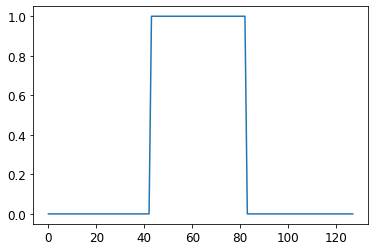

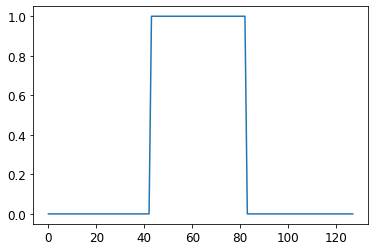

(128,)
(128,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
plt.plot(T)
plt.show()

sb1 = np.load("/content/current_domain_0.npy").reshape(64,)
sb2 = np.load("/content/current_domain_1.npy").reshape(64,)

sb = np.concatenate([sb1,sb2],axis=0)
plt.plot(sb)
plt.show()

print(T.shape)
print(sb.shape)
print(np.abs(T -sb))
# a = T
# a = sb
# print(np.where(a == 1))
assert np.allclose(T, sb)

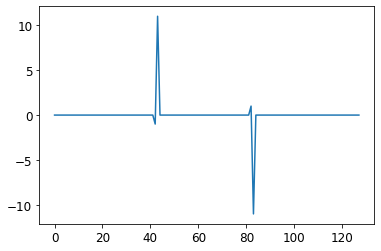

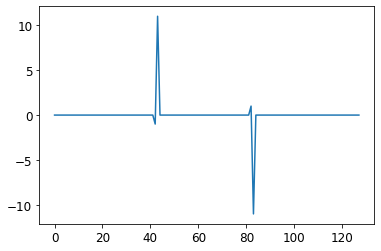

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  -1.  11.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1. -11.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]


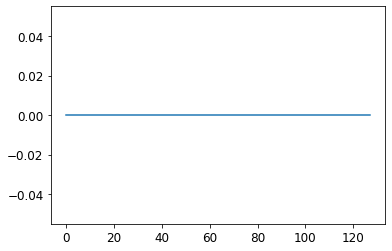

(128,)
(128,)


In [ ]:
s_r = r.numpy().reshape(128,)
plt.plot(s_r)
plt.show()

p_r1 = np.load("/content/r_0.npy").reshape(64,)
p_r2 = np.load("/content/r_1.npy").reshape(64,)

p_r = np.concatenate([p_r1,p_r2],axis=0)
plt.plot(p_r)
plt.show()

print(p_r)

assert p_r.shape == s_r.shape

r_abe = np.abs(s_r - p_r)
plt.plot(r_abe)
plt.show()

print(s_r.shape)
print(p_r.shape)

# Result analysis

## Compare result

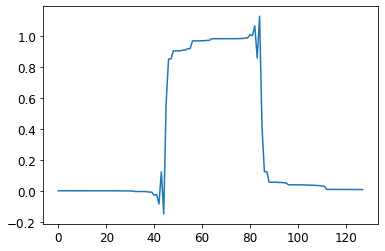

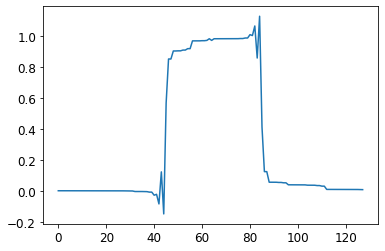

(128,)
(128,)
ABE: 0.0
AVG ABE: 0.0
AVG NORM ABE:  3.725290298461914e-09


In [ ]:
import numpy.linalg as LA

# plot the serial result
plt.plot(values[0,:, 0])
plt.show()

# plot the parallel result
res_1 = np.load('/content/parallel_output/parallel_res_0.npy').reshape(64,)
res_2 = np.load('/content/parallel_output/parallel_res_1.npy').reshape(64,)

parallel_solution = np.concatenate([res_1,res_2],axis=0)
plt.plot(parallel_solution)
plt.show()

# result analysis
print(values[0,:,0].shape)
print(parallel_solution.shape)
print("ABE:",np.sum(np.abs((values[0,:,0])) - np.abs(parallel_solution)))
print("AVG ABE:",np.sum(np.abs((values[0,:,0])) - np.abs(parallel_solution))/128)
print("AVG NORM ABE: ",np.abs(LA.norm(values[0,:,0]) - LA.norm(parallel_solution)) / 128)

# The accuracy error on the first multi-grid iteration is 0.0 and increase bit by bit in the following iterations

## residual on 2

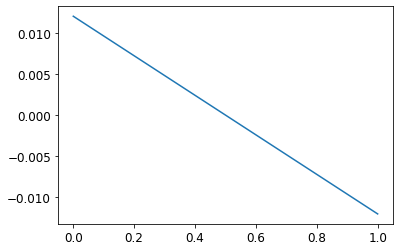

(2,)
(2,)
tf.Tensor([ 0.01201923 -0.01201923], shape=(2,), dtype=float32)
[ 0.01201923 -0.01201923]
0.0
0.0


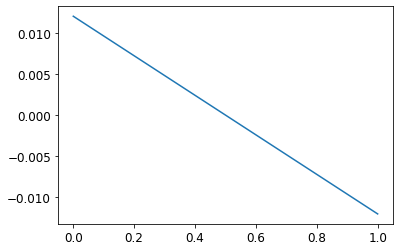

In [ ]:
plt.plot(w_2[0,:,0])
plt.show()

pw_1 = np.load('/content/parallel_residuals/w_0.npy')[0,:,0]
pw_2 = np.load('/content/parallel_residuals/w_1.npy')[0,:,0]

parallel_w = np.concatenate([pw_1,pw_2],axis=0)
plt.plot(parallel_w)
print(w_2[0,:,0].shape)
print(parallel_w.shape)
# validate
print(w_2[0,:,0])
print(parallel_w)
print(np.sum(np.abs(w_2[0,:,0] - parallel_w)) /2)
print(np.abs(LA.norm(w_2[0,:,0]) - LA.norm(parallel_w)) / 2)
# parallel_w.shape

## residual on 4

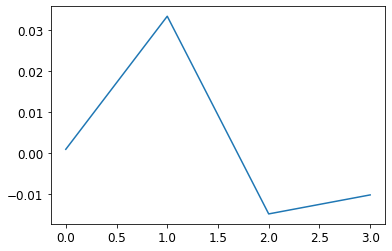

(4,)
(4,)
tf.Tensor([ 0.00092456  0.03328402 -0.0147929  -0.01017012], shape=(4,), dtype=float32)
[ 0.00092456  0.03328402 -0.0147929  -0.01017012]
0.0
0.0


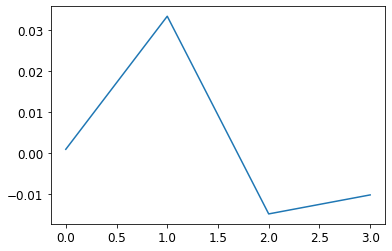

In [ ]:
plt.plot(w_4[0,:,0])
plt.show()

pw2_1 = np.load('/content/parallel_residuals/w2_0.npy')[0,:,0]
pw2_2 = np.load('/content/parallel_residuals/w2_1.npy')[0,:,0]

parallel_w2 = np.concatenate([pw2_1,pw2_2],axis=0)
plt.plot(parallel_w2)
print(w_4[0,:,0].shape)
print(parallel_w2.shape)
# validate
print(w_4[0,:,0])
print(parallel_w2)
print(np.sum(np.abs(w_4[0,:,0] - parallel_w2)) /4)
print(np.abs(LA.norm(w_4[0,:,0]) - LA.norm(parallel_w2)) / 4)

## residual on 8

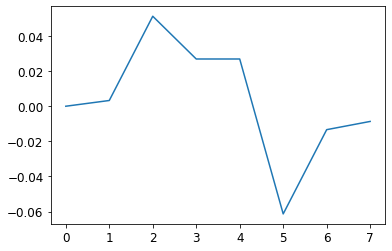

[0. 0. 0. 0. 0. 0. 0. 0.]
(8,)
(8,)
tf.Tensor(
[ 7.1119750e-05  3.3426264e-03  5.1419556e-02  2.7025491e-02
  2.7025487e-02 -6.1376311e-02 -1.3299385e-02 -8.6054849e-03], shape=(8,), dtype=float32)
[ 7.1119750e-05  3.3426264e-03  5.1419556e-02  2.7025491e-02
  2.7025487e-02 -6.1376311e-02 -1.3299385e-02 -8.6054849e-03]
0.0
0.0


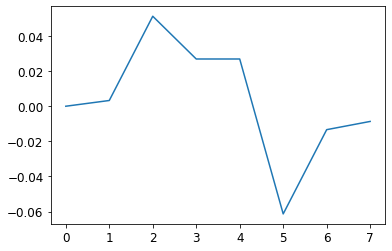

In [ ]:
plt.plot(w_8[0,:,0])
plt.show()

pw4_1 = np.load('/content/parallel_residuals/w4_0.npy')[0,:,0]
pw4_2 = np.load('/content/parallel_residuals/w4_1.npy')[0,:,0]

parallel_w4 = np.concatenate([pw4_1,pw4_2],axis=0)
print(np.abs(w_8[0,:,0] - parallel_w4))
plt.plot(parallel_w4)
print(w_8[0,:,0].shape)
print(parallel_w4.shape)
# validate
print(w_8[0,:,0])
print(parallel_w4)

print(np.sum(np.abs(w_8[0,:,0] - parallel_w4)) /8)
print(np.abs(LA.norm(w_8[0,:,0]) - LA.norm(parallel_w4)) / 8)

## residual on 16

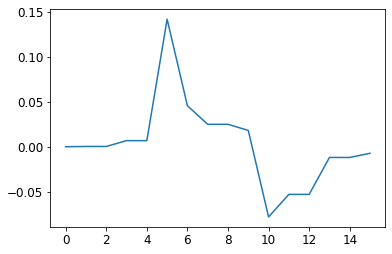

(16,)
(16,)
tf.Tensor(
[ 5.4707489e-06  3.1730335e-04  3.1730323e-04  6.7837266e-03
  6.7837276e-03  1.4174159e-01  4.5587741e-02  2.4946608e-02
  2.4946608e-02  1.8146466e-02 -7.8007385e-02 -5.2956834e-02
 -5.2956834e-02 -1.1915286e-02 -1.1915286e-02 -7.2815642e-03], shape=(16,), dtype=float32)
[ 5.4707489e-06  3.1730335e-04  3.1730323e-04  6.7837266e-03
  6.7837276e-03  1.4174159e-01  4.5587741e-02  2.4946608e-02
  2.4946608e-02  1.8146466e-02 -7.8007385e-02 -5.2956834e-02
 -5.2956834e-02 -1.1915286e-02 -1.1915286e-02 -7.2815642e-03]
0.0
0.0


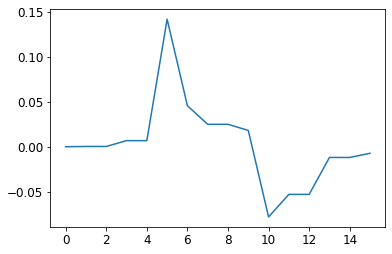

In [ ]:
plt.plot(w_16[0,:,0])
plt.show()

pw8_1 = np.load('/content/parallel_residuals/w8_0.npy')[0,:,0]
pw8_2 = np.load('/content/parallel_residuals/w8_1.npy')[0,:,0]

parallel_w8 = np.concatenate([pw8_1,pw8_2],axis=0)
plt.plot(parallel_w8)
print(w_16[0,:,0].shape)
print(parallel_w8.shape)
# validate
print(w_16[0,:,0])
print(parallel_w8)

print(np.sum(np.abs(w_16[0,:,0] - parallel_w8)) /16)
print(np.abs(LA.norm(w_16[0,:,0]) - LA.norm(parallel_w8)) / 16)

## residual on 32

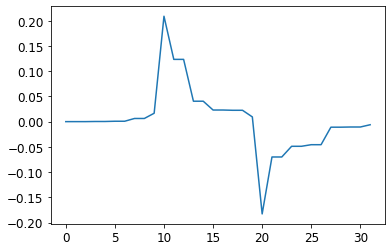

(32,)
(32,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
0.0
0.0


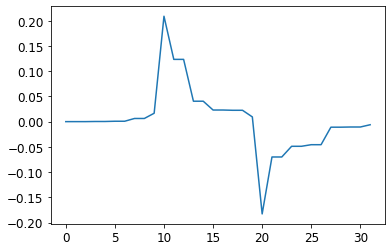

In [ ]:
plt.plot(w_32[0,:,0])
plt.show()

pw16_1 = np.load('/content/parallel_residuals/w16_0.npy')[0,:,0]
pw16_2 = np.load('/content/parallel_residuals/w16_1.npy')[0,:,0]

parallel_w16 = np.concatenate([pw16_1,pw16_2],axis=0)
plt.plot(parallel_w16)
print(w_32[0,:,0].shape)
print(parallel_w16.shape)
# validate
# print(w_32[0,:,0])
# print(parallel_w16)

print(np.abs(w_32[0,:,0] - parallel_w16))

print(np.sum(np.abs(w_32[0,:,0] - parallel_w16)) /32)
print(np.abs(LA.norm(w_32[0,:,0]) - LA.norm(parallel_w16)) / 32)


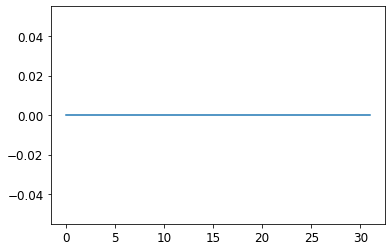

In [ ]:
# where are the error located ? 
abe = np.abs(w_32[0,:,0] - parallel_w16)
plt.plot(abe)
plt.show()

## residual on 64

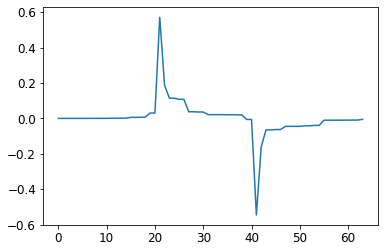

(64,)
(64,)
0.0
0.0


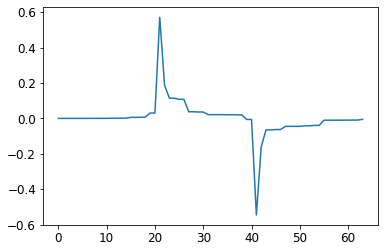

In [ ]:
plt.plot(w_64[0,:,0])
plt.show()

pw32_1 = np.load('/content/parallel_residuals/w32_0.npy')[0,:,0]
pw32_2 = np.load('/content/parallel_residuals/w32_1.npy')[0,:,0]

parallel_w32 = np.concatenate([pw32_1,pw32_2],axis=0)
plt.plot(parallel_w32)
print(w_64[0,:,0].shape)
print(parallel_w32.shape)
# validate
# print(w_64[0,:,0])
# print(parallel_w32)

print(np.sum(np.abs(w_64[0,:,0] - parallel_w32)) /64)
print(np.abs(LA.norm(w_64[0,:,0]) - LA.norm(parallel_w32)) / 64)

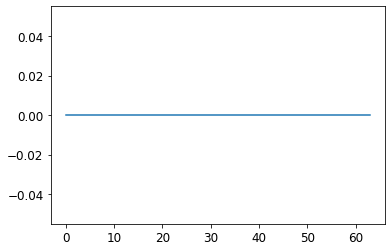

In [ ]:
# where are the error located ? 
abe = np.abs(w_64[0,:,0] - parallel_w32)
plt.plot(abe)
plt.show()

## residual on 128

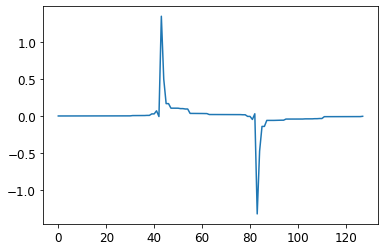

(128,)
(128,)
0.0
0.0


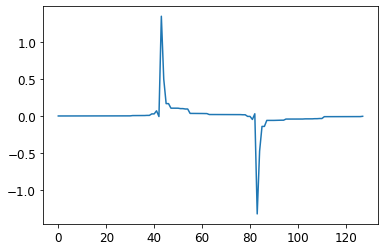

In [ ]:
plt.plot(w_128[0,:,0])
plt.show()

pw64_1 = np.load('/content/parallel_residuals/w64_0.npy')[0,:,0]
pw64_2 = np.load('/content/parallel_residuals/w64_1.npy')[0,:,0]

parallel_w64 = np.concatenate([pw64_1,pw64_2],axis=0)
plt.plot(parallel_w64)
print(w_128[0,:,0].shape)
print(parallel_w64.shape)
# validate
# print(w_128[0,:,0])
# print(parallel_w64)

print(np.sum(np.abs(w_128[0,:,0] - parallel_w64)) /128)
print(np.abs(LA.norm(w_128[0,:,0]) - LA.norm(parallel_w64)) / 128)